
## Multilayer Perceptron (MLP) for Number Recognition with Error Back Propagation Algorithm
##### A multilayer perceptron is a fully connected class of feedforward artificial neural network. The term MLP is used ambiguously, sometimes loosely to mean any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons. Here we are testing it to recognize a binary dataset input of various shapes of numbers
##### We are going to import various libraries such as numpy for multiplication, math, matplotlib for plotting the graphs
##### as well as keras datasets for our dataset (using the mnist dataset).


In [1]:

import numpy as np
import math
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt


## Getting our database and printing our our dataset
##### The MNIST database has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

##### We start by getting the mnist data, and then splitting the output and input as x and y
##### Num_data is used to determine which data we are going to train
##### The set_printoption function determines the way floating point numbers, arrays and other NumPy objects are displayed.
##### The keras to_categorical function is used to convert vectors into binary matrices.
##### This as a whole is the preprocessing part. We can convert the inputted x into an array

In [2]:
#Load the data, and split both x and y as training and testing data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#split data and categorize into the num_data variable
num_data = 500
train_X = train_X[:num_data]
train_y = train_y[:num_data]

np.set_printoptions(linewidth=200)
print(np.array(train_X[1]))

#Preprocessing
X = np.array([[[1 if dd > 0 else 0 for dd in m] for m in x] for x in train_X])
print(np.array(X[1]))

y = to_categorical(train_y)
print(y[1])

X = np.array([x.flatten() for x in X])
print(X[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

## Creating the sigmoid activation function and initializing our weights, loss and accuracy, and starting the Feed Forward Process of the Neural Network
##### We print out the current output as O (as our selected input)
##### We declare x and y input and output variables
##### We shape the num input and outputs
##### The sigmoid function (activation function) acts as a normalizer for numerical values in the hidden values. It normalizes the values to be set inbetween 0 and 1. It is so that we do not have too large of a hidden neuron value. The sigmoid function corresponds to the input value. 
#####  Weights are the parameter within a neural network that transforms input data within the network's hidden layers. As the input enters the node, it gets multiplied by a weight value. 
##### There are weights in both the hidden and output layer.
##### The Learning Rate (or u0) is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. 
##### The computation equation of the learning rate parameter is as follows:
$ u(k) = u0/(1 + k/(tao)) $

## Feedforward + Backprojection Algorithm 
#### After going through the 1st hidden layer, we use the sigmoid to normalize the values, and move on to the hidden output layer, with more or less, similiar process.
#### The step after this is that We need the error/cost function. Using MSE (The Mean Square Error). This works by calculating the difference between each output and the corresponding label value, then squaring each difference , then summing the resulting values together, then dividing by the number of output neurons. 
#### The resulting value is the error.
#### This process will repeat in a series of epochs. an Epoch is is how many cycles the machine learning model will train until desired accuracy and output

In [3]:
#Multilayer perceptron
input = X
target = y

#Configuration
num_input = input.shape[1]
num_hidden = 30
num_output = target.shape[1]

#The sigmoid function for the activation layer after initializing hidden layer values
def sigmoid(x):
    return 1/(1+math.exp(-x))
sig = np.vectorize(sigmoid)

#Defining the weight and bias values that will be used later
#B and W for hidden layer
w_hidden = np.random.uniform(low=-1, high=1, size=(num_input, num_hidden))
b_hidden = np.random.uniform(low=-1, high=1, size=(num_hidden))

#B and W for output layer
w_output = np.random.uniform(low=-1, high=1, size=(num_hidden, num_output))
b_output = np.random.uniform(low=-1, high=1, size=(num_output))

#Initialize loss and accuracy values in empty list
loss_value = []
acc_value = []

#Define the learning rate and how many times of epoch
lr = 0.5
epochs = 80 #This is how many times the neural network trains and goes through forward and back propagation

#Feed Forward
for epoch in range(epochs):
    MSE = 0 #MSE will be used for 
    new_target = np.zeros(target.shape)  #deppend on size of target  output
    
    # Loop the row data
    for index, inp in enumerate(input):
        
        # FEEDFORWARD
        # hiiden layer
        o_hidden = np.matmul(input[index], w_hidden) + b_hidden #Use the Matrix Multiplication method using no.matmul
        o_hidden = sig(o_hidden) # Putting the Feedforward function into the sigmoid
        
        # processing the output layer
        o_output = np.matmul(o_hidden, w_output) + b_output 
        o_output = sig(o_output) 
        
        #Error processing
        error = target[index] - o_output
        MSE = MSE + (np.sum((error**2)) / error.shape)
        new_target[index] = o_output.round()
        error_hidden = np.matmul(error, w_output.T)
        
        #BACKPROPAGATION Process
        #output layer
        #o_hidden[np.newaxis].T does matrix transposing
        w_output = w_output +  (lr * ((error * o_output * (1 - o_output)) * o_hidden[np.newaxis].T )) 
        b_output = b_output + (lr * ((error * o_output * (1 - o_output))))
        
        #hidden layer
        w_hidden = w_hidden + (lr * (error_hidden * o_hidden * (1 - o_hidden) * input[index][np.newaxis].T))
        b_hidden = b_hidden + (lr * (error_hidden * o_hidden * (1 - o_hidden)))
    
    #calculate MSE and Delta
    MSE = (MSE / input.shape[0])
    delta = np.absolute(target - new_target)
    accuracy = 1 - np.average([np.max(m) for m in delta])
    #append acc and loss values into empty lists
    acc_value.append(accuracy)
    loss_value.append(MSE)
    print("epoch : ",epoch," | error:",MSE, " | accuracy : ", accuracy )

epoch :  0  | error: [0.07263021]  | accuracy :  0.19199999999999995
epoch :  1  | error: [0.04620254]  | accuracy :  0.492
epoch :  2  | error: [0.03768787]  | accuracy :  0.6
epoch :  3  | error: [0.02910927]  | accuracy :  0.704
epoch :  4  | error: [0.02522862]  | accuracy :  0.744
epoch :  5  | error: [0.02209317]  | accuracy :  0.782
epoch :  6  | error: [0.01753697]  | accuracy :  0.836
epoch :  7  | error: [0.01623466]  | accuracy :  0.844
epoch :  8  | error: [0.01223603]  | accuracy :  0.896
epoch :  9  | error: [0.01251771]  | accuracy :  0.868
epoch :  10  | error: [0.01004172]  | accuracy :  0.916
epoch :  11  | error: [0.0093664]  | accuracy :  0.918
epoch :  12  | error: [0.00546828]  | accuracy :  0.95
epoch :  13  | error: [0.00524039]  | accuracy :  0.962
epoch :  14  | error: [0.00528703]  | accuracy :  0.946
epoch :  15  | error: [0.00412759]  | accuracy :  0.964
epoch :  16  | error: [0.00312688]  | accuracy :  0.98
epoch :  17  | error: [0.00286909]  | accuracy : 

#### Back propagation works by propagating the error from the end back to the start. We need to calculate the delta to each neuron.  We can just write o - l. Delta output is just the difference between the output and the label.  In the next step, the delta values are used in a matrix multiplication with the hidden layer outputs to get an update value to each weight connecting both layers. We want to adjust the weights carefully. 
#### After running the training process, we plot the accuracy and loss graph to show how by each epoch, the model slowly learns and accuracy of the pattern recognition gets more accurate

<function matplotlib.pyplot.show(close=None, block=None)>

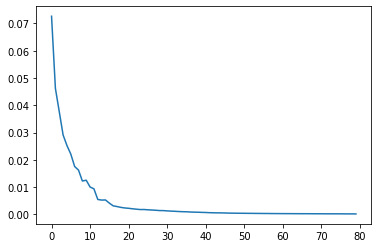

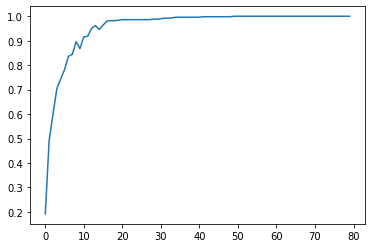

In [4]:

#Output the loss value
plot1 = plt.figure(1)
plt.plot(loss_value)
plt.show

#output the accuracy value
plot2 = plt.figure(2)
plt.plot(acc_value)
plt.show

## The Testing Phase
##### After training the model, we test the same model to get our new number recognition. and Output the results of the testing process. The process and output is as follows.

In [5]:
new_target_test =  np.zeros(target.shape)

#Feedforward value
for index, inp in enumerate(input):
  #Hidden layer
  o_hidden = np.matmul(input[index], w_hidden) + b_hidden 
  o_hidden = sig(o_hidden)

  #Processing output layer
  o_output = np.matmul(o_hidden, w_output) + b_output 
  o_output = sig(o_output) 

  new_target_test[index] = o_output.round()


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 

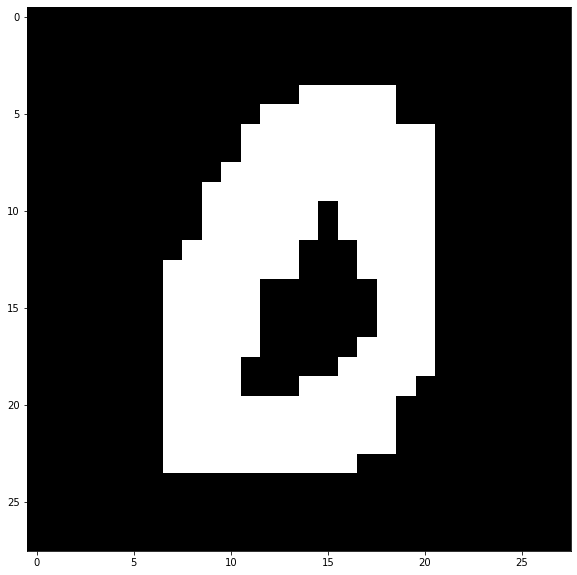

In [6]:
#Testing

#Which image to train:
index_image_test = 95

#Reshape output into shape of input matrix
reshape_input = input.reshape(num_data,28,28)
print(reshape_input[index_image_test])

#Testing
test_target = new_target_test[index_image_test]
print("test_target : ", test_target)

max_index_row = np.argmax(test_target)
print("row output learning / predicted text: ", max_index_row)

print("expected image: ")
plt.figure(figsize=(10,10))
plt.imshow(reshape_input[index_image_test], cmap=plt.get_cmap('gray'))
plt.show()